# Integradora 1

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tokenize import word_tokenize

# import pickle

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize

from nltk.classify import ClassifierI
from statistics import mode

In [ ]:
# Utilizar gpu para tensorflow (no se si es mejor utilizar TPU)
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Classe para votar por el mejor clasificador (no creo que sirva con las RNN de keras)
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [ ]:
short_pos = open("positive.txt", "r", encoding='latin-1').read()
short_neg = open("negative.txt", "r", encoding='latin-1').read()

In [ ]:
all_words = []
documents = []

In [ ]:
# allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

for p in short_pos.split('\n'):
    documents.append((p, "pos"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
for p in short_neg.split('\n'):
    documents.append((p, "neg"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [ ]:
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:5000]

In [ ]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [ ]:
featureset = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featureset)

training_set = featureset[:10000]
testing_set = featureset[10000:]


In [ ]:
## LogisticRegression
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression accuracy percent: ", (nltk.classify.accuracy(LogisticRegression_classifier,testing_set)) * 100)

LogisticRegression accuracy percent:  73.79518072289156


In [ ]:
## Mulinomial naive bayes
# MultinomialNB_classifier = SklearnClassifier(MultinomialNB())
# MultinomialNB_classifier.train(training_set)
# print("MultinomialNB accuracy percent: ", (nltk.classify.accuracy(MultinomialNB_classifier,testing_set)) * 100)

In [ ]:
## Bernouli naive bayes
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB accuracy percent: ", (nltk.classify.accuracy(BernoulliNB_classifier,testing_set)) * 100)

BernoulliNB accuracy percent:  72.7409638554217


In [ ]:
## SGDClassifier
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier accuracy percent: ", (nltk.classify.accuracy(SGDClassifier_classifier,testing_set)) * 100)

SGDClassifier accuracy percent:  73.64457831325302


In [ ]:
## LinearSVC
# LinearSVC_classifier = SklearnClassifier(LinearSVC())
# LinearSVC_classifier.train(training_set)
# print("LinearSVC accuracy percent: ", (nltk.classify.accuracy(LinearSVC_classifier,testing_set)) * 100)


In [ ]:
voted_classifier = VoteClassifier(BernoulliNB_classifier, SGDClassifier_classifier, LogisticRegression_classifier)
print("Voted classifier accuracy percent: ", (nltk.classify.accuracy(voted_classifier,testing_set)) * 100)
print("Classification: ", voted_classifier.classify(testing_set[0][0]), " Confidence percent: ", voted_classifier.confidence(testing_set[0][0]) * 100)

Voted classifier accuracy percent:  74.09638554216868
Classification:  pos  Confidence percent:  100.0


In [ ]:
def sentiment(text):
    feats = find_features(text)

    return voted_classifier.classify(feats), voted_classifier.confidence(feats)

In [ ]:
sentiment("I hate this thing")

('neg', 1.0)

## Cosas del Tweet Stream

In [ ]:
"""
# Tweet Stream, hay que agregar las llaves propias

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

# import sentiment_mod as s

# consumer key, consumer secret, access token, access secret.
ckey="???"
csecret="???"
atoken="???"
asecret="???"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)

        tweet = all_data["text"]
        sentiment_value, confidence = sentiment(tweet)

        print(tweet, sentiment_value, confidence)

        if confidence*100 >= 60:
            output = open("twitter-out.txt", "a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()

        return True

    def on_error(self, status):
        print (status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["happy"])
"""

'\n# Tweet Stream, hay que agregar las llaves propias\n\nfrom tweepy import Stream\nfrom tweepy import OAuthHandler\nfrom tweepy.streaming import StreamListener\nimport json\n\n# import sentiment_mod as s\n\n# consumer key, consumer secret, access token, access secret.\nckey="???"\ncsecret="???"\natoken="???"\nasecret="???"\n\nclass listener(StreamListener):\n\n    def on_data(self, data):\n        all_data = json.loads(data)\n\n        tweet = all_data["text"]\n        sentiment_value, confidence = sentiment(tweet)\n\n        print(tweet, sentiment_value, confidence)\n\n        if confidence*100 >= 60:\n            output = open("twitter-out.txt", "a")\n            output.write(sentiment_value)\n            output.write(\'\n\')\n            output.close()\n\n        return True\n\n    def on_error(self, status):\n        print (status)\n\nauth = OAuthHandler(ckey, csecret)\nauth.set_access_token(atoken, asecret)\n\ntwitterStream = Stream(auth, listener())\ntwitterStream.filter(track=[

In [ ]:
"""
# Funcion para graficar los tweets

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')
    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()
"""


'\n# Funcion para graficar los tweets\n\nimport matplotlib.pyplot as plt\nimport matplotlib.animation as animation\nfrom matplotlib import style\nimport time\n\nstyle.use("ggplot")\n\nfig = plt.figure()\nax1 = fig.add_subplot(1,1,1)\n\ndef animate(i):\n    pullData = open("twitter-out.txt","r").read()\n    lines = pullData.split(\'\n\')\n    xar = []\n    yar = []\n\n    x = 0\n    y = 0\n\n    for l in lines:\n        x += 1\n        if "pos" in l:\n            y += 1\n        elif "neg" in l:\n            y -= 1\n\n        xar.append(x)\n        yar.append(y)\n        \n    ax1.clear()\n    ax1.plot(xar,yar)\nani = animation.FuncAnimation(fig, animate, interval=1000)\nplt.show()\n'

# Actividad Integradora 2

## Base de datos con texto etiquetado como positivo y negativo

In [ ]:
# Utilizar gpu para tensorflow (no se si es mejor utilizar TPU)
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Aqui subes tu json creado con tu cuenta de kaggle con tu username y llave

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"genaromateu","key":"43aaba923459ea67762ec4610ab3d714"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d kazanova/sentiment140

 90% 73.0M/80.9M [00:00<00:00, 63.7MB/s]
100% 80.9M/80.9M [00:00<00:00, 110MB/s] 


In [ ]:
!unzip sentiment140.zip && rm sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("training.1600000.processed.noemoticon.csv", engine='python', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df.drop(columns=[1, 2, 3, 4])
df.columns = ['Target', 'Text']
df.head()

,Target,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
print(df['Target'].unique())
df.sort_values(by=['Target'])
df_neg = df[df.Target == 0].sample(200000)
df_pos = df[df.Target == 4].sample(200000)
df = pd.concat([df_neg,df_pos])
df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)
df.shape

[0 4]


(400000, 2)

In [ ]:
# Limpiando los datos

# df['Text'] = df['Text'].apply(lambda x: re.sub(r"http\S+", "", x))
df["Text"] = df["Text"].str.replace(r"http\S+","")
# df['Text'] = df['Text'].apply(lambda x: re.sub(r"@\S+", "", x))
df["Text"] = df["Text"].str.replace(r"@\S+","")
df['Target'] = (df['Target'] == 4).astype(int)
df.tail()

,Target,Text
399995,1,i don't know why my current obsesh is yellowca...
399996,1,super jail is on.... the redhead sorda scares...
399997,0,Because I do.
399998,0,I'd say less than 0.000001%. Unless my sister...
399999,1,Lead the charge and create a new fad! Everyth...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

my_sw = stopwords.words('english')
my_sw.remove('not')
my_sw.remove('no')
my_sw.remove('nor')

def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in my_sw]
  return " ".join(filtered_sentence)

df["Text"] = df["Text"].apply(remove_stopwords)

print(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
        Target                                               Text
0            1  finally ! overcome writers block ! even sucks ...
1            0                                           headache
2            1     hello debbie , tell , would like meet brazil ?
3            0  poor baby got stung scorpion love nature buti ...
4            0  saw pics took . gino & amp ; fran . also went ...
...        ...                                                ...
399995       1  n't know current obsesh yellowcard ... 's awes...
399996       1          super jail ... . redhead sorda scares : ?
399997       0                                                  .
399998       0  'd say less 0.000001 % . unless sister get ......
399999       1  lead charge create new fad ! everyth

In [ ]:
# df = shuffle(df, random_state=1)

df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)
print(df)

        Target                                               Text
0            1  food pick , church , hanging cleaning parents ...
1            0          wish magical way make throat stop hurting
2            0                    arms feel like 're going fall .
3            1  gagi arrived safe sound . yusef rushed hug sta...
4            0  feel heart beating damn fast ... n't feel good...
...        ...                                                ...
399995       1  finally home watching nick norahs infinite pla...
399996       0  & quot ; 's amazing hide ... putting smile ......
399997       1                      aca ttn make stubid saw btn .
399998       1  watching nightly # southpark , creating tests ...
399999       1                         happy happy hope great day

[400000 rows x 2 columns]


In [ ]:
df.shape

(400000, 2)

## Modelos RNN

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['Text'])
word_index = tokenizer.word_index

In [ ]:
import tensorflow as tf
max_len = 40
sequence = tokenizer.texts_to_sequences(df['Text'])
sequence_padded = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_len)
sequence_padded

array([[     0,      0,      0, ...,    625,    698,    567],
       [     0,      0,      0, ...,    635,    252,   1350],
       [     0,      0,      0, ...,     50,     15,    560],
       ...,
       [     0,      0,      0, ..., 127642,    204,  19293],
       [     0,      0,      0, ...,   2110, 127643,   1406],
       [     0,      0,      0, ...,     47,     45,      6]], dtype=int32)

In [ ]:
train_size = int(df.shape[0] * 0.8)

X_train = sequence_padded[:train_size]
y_train = df.Target[:train_size]

X_test = sequence_padded[train_size:]
y_test = df.Target[train_size:]

In [ ]:
# Descargar los archivos de glove
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-07-20 03:08:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-20 03:08:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-20 03:08:37--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# Embedding Dictionary
import numpy as np

embedding_dict = {}
with open("glove.6B.300d.txt", "r") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], "float32")
        embedding_dict[word] = vectors
f.close()

In [ ]:
# Embedding Matrix
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 300))

for word, i in word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec

### Modelo 1

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model_1 = Sequential()

model_1.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_len,
        trainable=False,
    )
)
model_1.add(LSTM(100))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=0.0001)

model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 300)           38293200  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 38,453,701
Trainable params: 160,501
Non-trainable params: 38,293,200
_________________________________________________________________


In [ ]:
history_model_1 = model_1.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test),
    verbose=1,
)

Epoch 1/10
2500/2500 [==============================] - 41s 8ms/step - loss: 0.5797 - accuracy: 0.6940 - val_loss: 0.5074 - val_accuracy: 0.7531
Epoch 2/10
2500/2500 [==============================] - 20s 8ms/step - loss: 0.5048 - accuracy: 0.7527 - val_loss: 0.4866 - val_accuracy: 0.7663
Epoch 3/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4829 - accuracy: 0.7682 - val_loss: 0.4711 - val_accuracy: 0.7768
Epoch 4/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.4698 - accuracy: 0.7759 - val_loss: 0.4631 - val_accuracy: 0.7808
Epoch 5/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4612 - accuracy: 0.7811 - val_loss: 0.4574 - val_accuracy: 0.7842
Epoch 6/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.4532 - accuracy: 0.7865 - val_loss: 0.4532 - val_accuracy: 0.7868
Epoch 7/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.4483 - accuracy: 0.7893 - val_loss: 0.4527 - val_ac

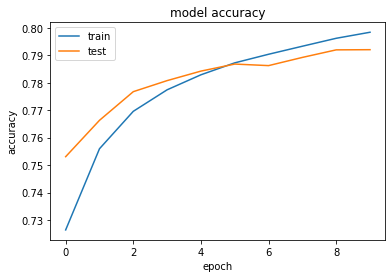

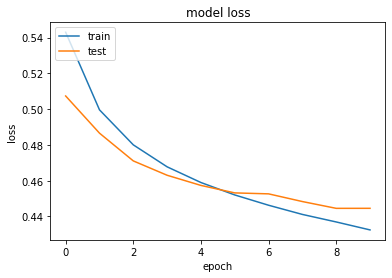

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_prob = model_1.predict(X_test) 
y_pred = y_prob.round().astype("int")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     39775
           1       0.80      0.79      0.79     40225

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



### Modelo 2

In [ ]:
from keras.layers import GRU

model_2 = Sequential()

model_2.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_len,
        trainable=False,
    )
)
model_2.add(GRU(4))
model_2.add(Dropout(0.1))
model_2.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=0.00001)

model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 300)           38293200  
_________________________________________________________________
gru (GRU)                    (None, 4)                 3672      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 38,296,877
Trainable params: 3,677
Non-trainable params: 38,293,200
_________________________________________________________________


In [ ]:
history_model_2 = model_2.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test),
    verbose=1,
)

Epoch 1/10
2500/2500 [==============================] - 18s 6ms/step - loss: 0.6988 - accuracy: 0.5031 - val_loss: 0.6827 - val_accuracy: 0.5665
Epoch 2/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.6792 - accuracy: 0.5729 - val_loss: 0.6661 - val_accuracy: 0.6120
Epoch 3/10
2500/2500 [==============================] - 16s 7ms/step - loss: 0.6634 - accuracy: 0.6139 - val_loss: 0.6498 - val_accuracy: 0.6450
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6477 - accuracy: 0.6428 - val_loss: 0.6340 - val_accuracy: 0.6647
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6334 - accuracy: 0.6614 - val_loss: 0.6192 - val_accuracy: 0.6783
Epoch 6/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.6189 - accuracy: 0.6747 - val_loss: 0.6055 - val_accuracy: 0.6888
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.6069 - accuracy: 0.6847 - val_loss: 0.5930 - val_ac

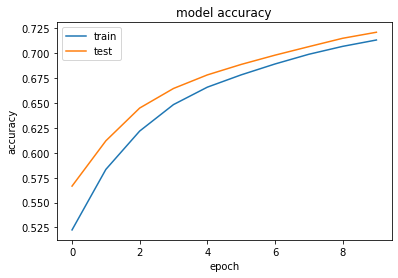

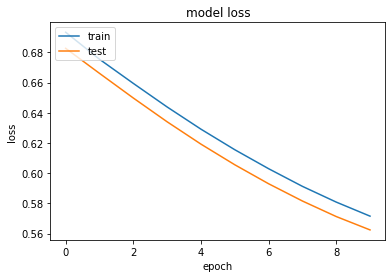

In [ ]:
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_prob = model_2.predict(X_test) 
y_pred = y_prob.round().astype("int")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     39775
           1       0.73      0.71      0.72     40225

    accuracy                           0.72     80000
   macro avg       0.72      0.72      0.72     80000
weighted avg       0.72      0.72      0.72     80000



### Modelo 3

In [ ]:
model_3 = Sequential()

model_3.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_len,
        trainable=False,
    )
)
model_3.add(LSTM(64))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=0.00001)

model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           38293200  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 38,387,697
Trainable params: 94,497
Non-trainable params: 38,293,200
_________________________________________________________________


In [ ]:
history_model_3 = model_3.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test),
    verbose=1,
)

Epoch 1/10
2500/2500 [==============================] - 21s 8ms/step - loss: 0.6754 - accuracy: 0.5845 - val_loss: 0.5984 - val_accuracy: 0.7027
Epoch 2/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.5902 - accuracy: 0.7018 - val_loss: 0.5606 - val_accuracy: 0.7220
Epoch 3/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.5609 - accuracy: 0.7189 - val_loss: 0.5455 - val_accuracy: 0.7302
Epoch 4/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.5498 - accuracy: 0.7250 - val_loss: 0.5362 - val_accuracy: 0.7351
Epoch 5/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.5408 - accuracy: 0.7311 - val_loss: 0.5296 - val_accuracy: 0.7390
Epoch 6/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.5334 - accuracy: 0.7348 - val_loss: 0.5243 - val_accuracy: 0.7419
Epoch 7/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.5296 - accuracy: 0.7369 - val_loss: 0.5200 - val_ac

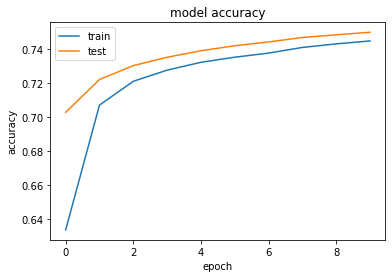

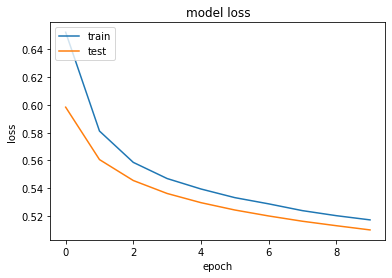

In [ ]:
plt.plot(history_model_3.history['accuracy'])
plt.plot(history_model_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_model_3.history['loss'])
plt.plot(history_model_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_prob = model_3.predict(X_test) 
y_pred = y_prob.round().astype("int")

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     39775
           1       0.76      0.73      0.75     40225

    accuracy                           0.75     80000
   macro avg       0.75      0.75      0.75     80000
weighted avg       0.75      0.75      0.75     80000



In [ ]:
import re

def cleanText(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)

    text = text.lower()

    text2 = ""
    text2 = text2 + text

    return text2

In [ ]:
def getSequencePadded(text):
    # Tokenize
    text = [text]
    tokenizer.fit_on_texts(text)
    word_index = tokenizer.word_index
    max_len = 40
    sequence = tokenizer.texts_to_sequences(text)
    for i in range(len(sequence[0])): # Quitar los valores que estan fuera del rango permitido
        if sequence[0][i] > 28010:
            sequence[0][i] = 0
    sequence_padded = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_len)
    # print(sequence_padded)
    return sequence_padded

In [ ]:
def predictTextRNN(model, text):
  y_prob = model.predict(getSequencePadded(text)) 
  y_pred = y_prob.round().astype("int")

  return y_pred[0]

In [ ]:
predictTextRNN(model_3, "Wow this is kinda bad")

array([0])

In [ ]:
from statistics import mode
# Prediccion utilizando todos los modelos de RNN
def classifyAndConficenceRNN(models, text):
    votes = []
    for m in models:
        v = predictTextRNN(m, text)[0]
        votes.append(v)

    classify = mode(votes)

    choice_votes = votes.count(classify)
    conf = choice_votes / len(votes)
    
    if classify == 1:
        classify = 'pos'
    else:
        classify = 'neg'

    return classify, conf

In [ ]:
sentiment_value, confidence = classifyAndConficenceRNN([model_1, model_2, model_3], "happy birthday beautiful 💗 i hope you have a wonderful day")
print(sentiment_value, confidence)

pos 0.6666666666666666


In [ ]:
# Prediccion utilizando los modelos de la actividad integradora 1 y 2
def classifyAndConficenceAll(RNNmodels, text):
    sentiment_valueRNN, confidenceRNN = classifyAndConficenceRNN([model_1, model_2, model_3], text) ## Calcular sentimiento para los modelos RNN
    sentiment_valueClass, confidenceClass = sentiment(text) # Calcular sentimiento para los clasificadores de Act 1

    if sentiment_valueRNN == sentiment_valueClass:
        return sentiment_valueRNN, (confidenceRNN + confidenceClass)/2

    elif sentiment_valueRNN > sentiment_valueClass:
        return sentiment_valueRNN, (confidenceRNN + (1 - confidenceClass))/2

    elif sentiment_valueClass > sentiment_valueRNN:
        return sentiment_valueClass, (confidenceClass + (1 - confidenceClass))/2


In [ ]:
sentiment_value, confidence = classifyAndConficenceAll([model_1, model_2, model_3], "happy birthday beautiful 💗 i hope you have a wonderful day")
print(sentiment_value, confidence)

pos 1.0


### Classificacion de tweetsteam utilizando los modelos rnn

In [ ]:
import time

# Tweet Stream, hay que agregar las llaves propias

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

# import sentiment_mod as s

# consumer key, consumer secret, access token, access secret.
ckey="???"
csecret="???"
atoken="???"
asecret="???"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)

        tweet = all_data["text"]
        tweet = cleanText(tweet)
        print(tweet)
        #sentiment_valueRNN, confidenceRNN = classifyAndConficenceRNN([model_1, model_2, model_3], tweet) ## Calcular sentimiento para los modelos RNN
        #sentiment_valueClass, confidenceClass = sentiment(tweet) # Calcular sentimiento para los clasificadores de Act 1

        sentiment_value, confidence = classifyAndConficenceAll([model_1, model_2, model_3], tweet) # Calcular clase con todos los modelos
        print(sentiment_value, confidence)
        time.sleep(0.5)

        if confidence*100 >= 50:
            output = open("twitter-out.txt", "a")
            # toFile = tweet + ', ' + sentiment_value
            toFile = sentiment_value
            output.write(toFile) # Escribir los resultados en el archivo de texto, falta integrar los resultados. 
            output.write('\n')
            output.close()

        return True

    def on_error(self, status):
        print (status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["biden"])
# twitterStream.filter(follow=["2211149702"]) # Para filtrar por usuario utilizando twitter ID (el id mostrado es un ejemplo)


In [ ]:
# Funcion para graficar los tweets

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')
    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()


In [ ]:
!pip install SpeechRecognition

audioText = ""

import speech_recognition as sr
filename = "Ejemplo.wav"
# initialize the recognizer
r = sr.Recognizer()
# open the file
with sr.AudioFile(filename) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    audioText = text
    print(audioText)

In [ ]:
sentiment_value, confidence = classifyAndConficenceAll([model_1, model_2, model_3], audioText)
print(sentiment_value, confidence)